<a href="https://www.kaggle.com/code/kparthiban007/agriculture-land-analysis?scriptVersionId=216516789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#ffecd2; color:#2b1e19; padding:15px; font-size:25px; border-radius:25px; text-align:center;">Soil Analysis</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/kaggle/input/agricultural-land-suitability-and-soil-quality/bangladesh_divisions_dataset.csv")
df.head()

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Remarks
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon,2024-09-24,Requires attention
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn,2024-01-31,Moderate potential
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn,2024-03-11,Requires attention
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn,2024-09-29,Low potential
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter,2024-04-01,Moderate potential


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    2000 non-null   object 
 1   Soil_Type                   2000 non-null   object 
 2   Fertility_Index             2000 non-null   int64  
 3   Land_Use_Type               2000 non-null   object 
 4   Average_Rainfall(mm)        2000 non-null   int64  
 5   Temperature(°C)             2000 non-null   float64
 6   Crop_Suitability            2000 non-null   object 
 7   Season                      2000 non-null   object 
 8   Satellite_Observation_Date  2000 non-null   object 
 9   Remarks                     2000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 156.4+ KB


In [3]:
df.isnull().sum()

Location                      0
Soil_Type                     0
Fertility_Index               0
Land_Use_Type                 0
Average_Rainfall(mm)          0
Temperature(°C)               0
Crop_Suitability              0
Season                        0
Satellite_Observation_Date    0
Remarks                       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.rename(columns={"Average_Rainfall(mm)":"Average_Rainfall_mm","Temperature(°C)":"Temperature_Celsius"})

In [6]:
numeric_columns = ['Fertility_Index', 'Average_Rainfall_mm', 'Temperature_Celsius']
categoric_columns = ['Location', 'Soil_Type', 'Land_Use_Type', 'Crop_Suitability', 'Season', 'Remarks']
numeric_columns ,categoric_columns

(['Fertility_Index', 'Average_Rainfall_mm', 'Temperature_Celsius'],
 ['Location',
  'Soil_Type',
  'Land_Use_Type',
  'Crop_Suitability',
  'Season',
  'Remarks'])

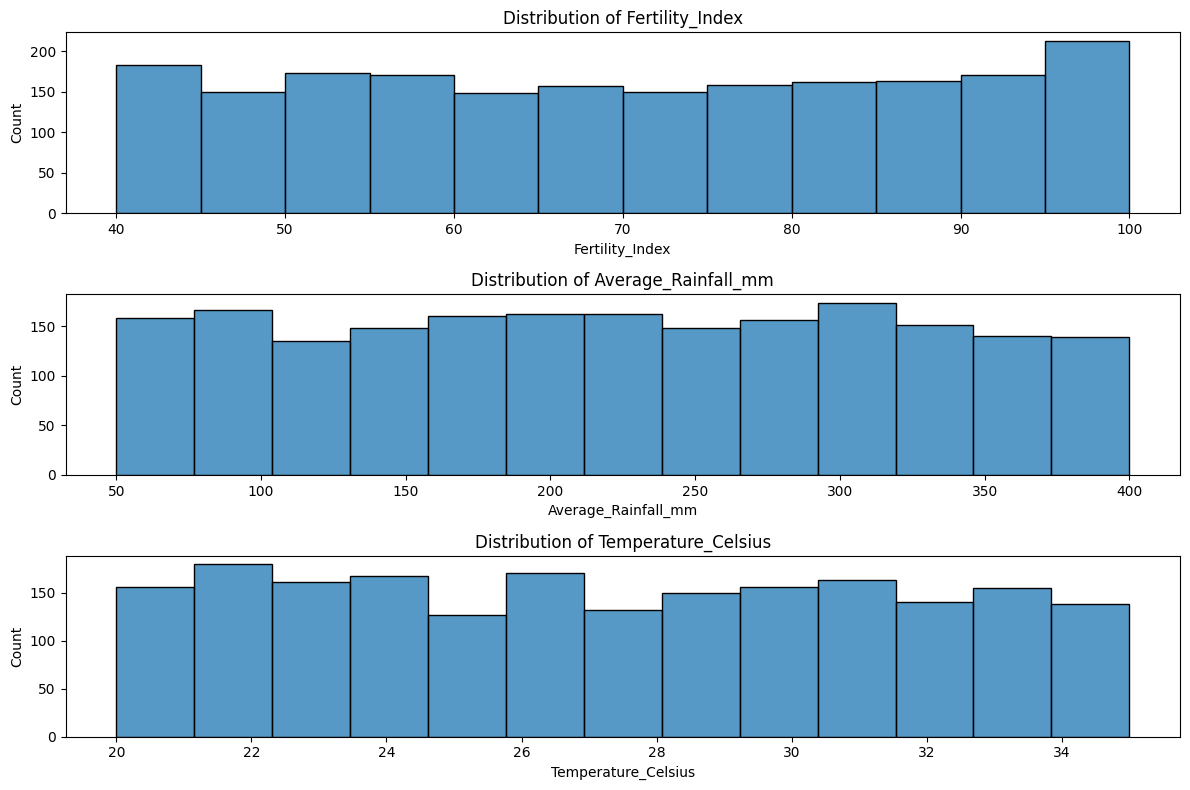

In [7]:
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_columns):
    i +=1
    plt.subplot(3,1,i)
    sns.histplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()
    
    

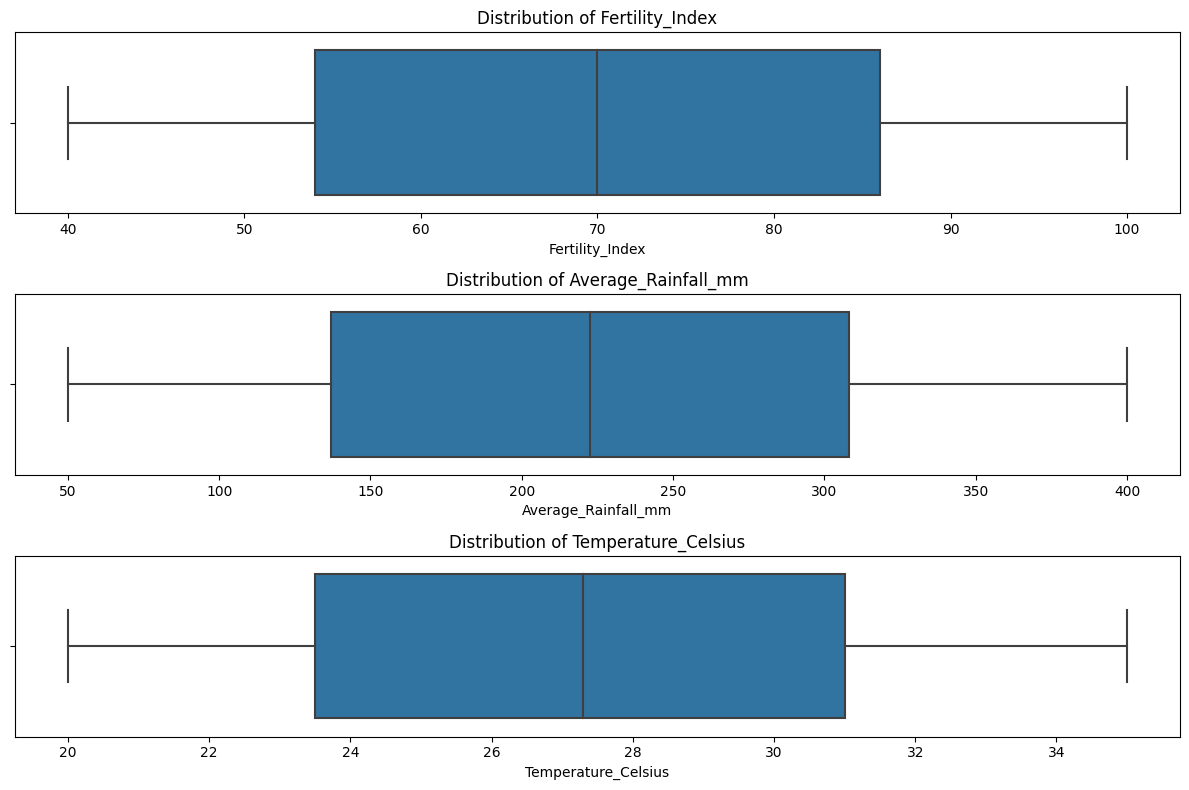

In [8]:
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_columns):
    i +=1
    plt.subplot(3,1,i)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

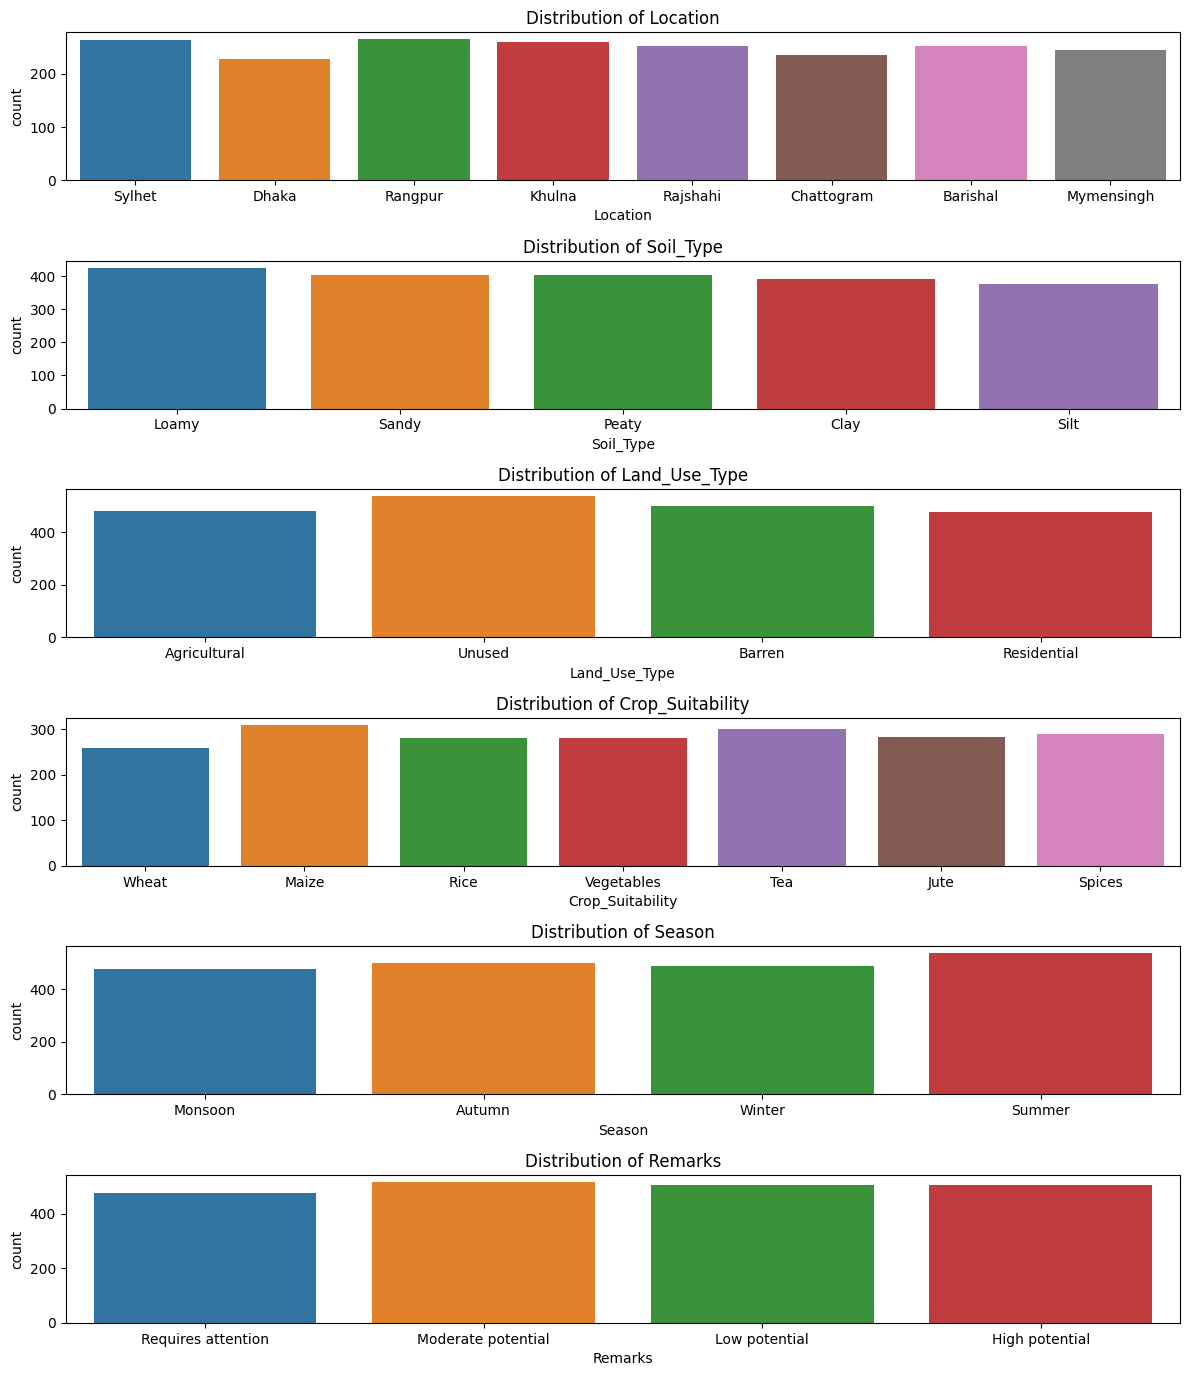

In [9]:
plt.figure(figsize=(12,18))
for i,col in enumerate(categoric_columns):
    i +=1
    plt.subplot(8,1,i)
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

In [10]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['Season', 'Soil_Type','Land_Use_Type'],
    title='Land Use Breakdown by Soil Type and Crop Suitability',
    color='Season',
)
fig.update_layout(
    width=1100,  
    height=650 
)
fig.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
scaler = MinMaxScaler()
encoder = LabelEncoder()

dff = df[['Location', 'Soil_Type', 'Land_Use_Type', 'Crop_Suitability', 'Season', 'Remarks','Fertility_Index', 'Average_Rainfall_mm', 'Temperature_Celsius']]

for col in categoric_columns:
    dff[col] = encoder.fit_transform(df[col])


dff[numeric_columns] = scaler.fit_transform(dff[numeric_columns])

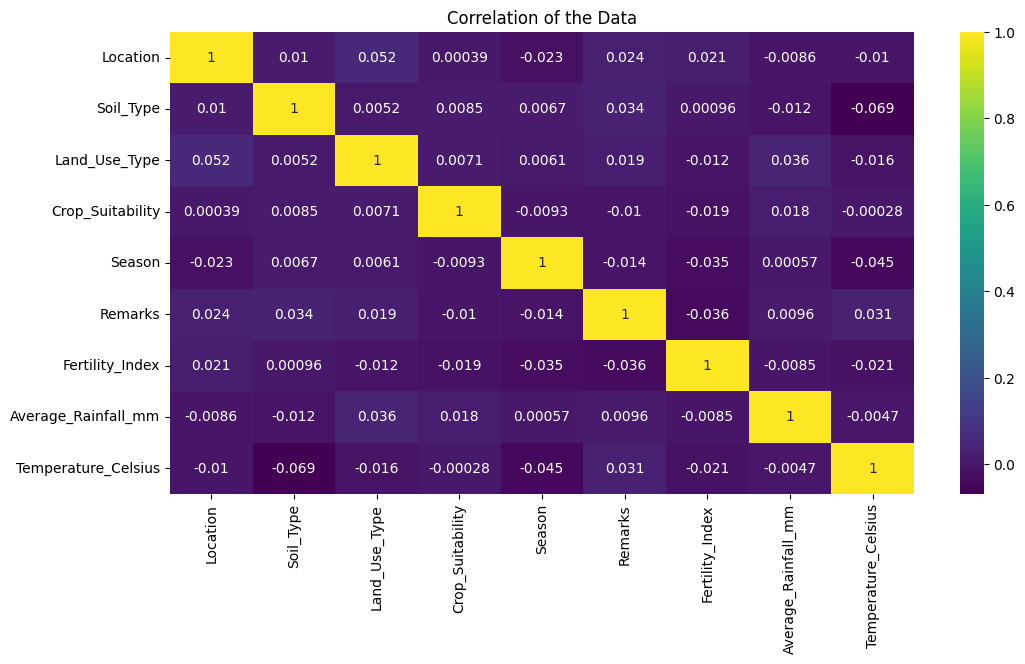

In [12]:
corr  = dff.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr , annot =True , cmap ="viridis")
plt.title("Correlation of the Data")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split 

x = dff.drop(columns='Fertility_Index')
y = dff['Fertility_Index']

x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state =42)
print(x_train, y_train, x_test, y_test)

      Location  Soil_Type  Land_Use_Type  Crop_Suitability  Season  Remarks  \
968          4          0              1                 4       3        0   
240          5          3              0                 3       3        0   
819          7          3              1                 5       2        1   
692          3          0              2                 3       1        3   
420          2          1              3                 4       1        1   
...        ...        ...            ...               ...     ...      ...   
1130         4          1              2                 5       0        1   
1294         1          1              1                 6       2        1   
860          3          1              2                 6       3        3   
1459         7          1              0                 2       3        1   
1126         1          0              3                 6       2        2   

      Average_Rainfall_mm  Temperature_Celsius  
96

In [14]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

def evaluation_metrics(model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    rmse = mse**0.5
    print(model)
    print("Mean Absolute Error : ", mse)
    print("Mean Absolute Error : ",mae)
    print("Root mean Squared Error : ",rmse)
    

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred= lr.predict(x_test)
evaluation_metrics("Linear Regression",y_test,lr_pred)

Linear Regression
Mean Absolute Error :  0.08694128238175132
Mean Absolute Error :  0.2548741959726192
Root mean Squared Error :  0.2948580715899623


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
evaluation_metrics("Decision Tree",y_test,rf_pred)

Decision Tree
Mean Absolute Error :  0.09104541763888889
Mean Absolute Error :  0.25872833333333334
Root mean Squared Error :  0.30173733219290066
